In [1]:
import signac
import matplotlib.pyplot as plt
import numpy as np

In [2]:
project = signac.get_project()
schema = project.detect_schema()

In [3]:
schema.values()

dict_values([defaultdict(<class 'set'>, {<class 'int'>: {3, 4, 5, 6, 7, 8, 9, 10, 11, 12}}), defaultdict(<class 'set'>, {<class 'int'>: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}})])

In [4]:
# Turning defaultdict into a python dictionary
schema_values = [*schema.items()]
statepoints = {}
for sp in schema_values:
    for key in sp[1].keys():
        statepoints[sp[0]] = list(sp[1][key])
        statepoints[sp[0]].sort()

In [5]:
means = []
rates = []
rates_stds = []
stds = []
for nmer_size in statepoints['nmer']:
    timings = []
    for job in project.find_jobs({'nmer':nmer_size}):
        timings.append(job.data['timing'])
    print("CG foldamers of with", nmer_size*3, "monomers took:")
    print(np.mean(timings), "seconds")
    print(500000/np.mean(timings), "steps/seconds")
    means.append(np.mean(timings))
    stds.append(np.std(timings))
    rates.append(np.mean(500000/np.array(timings)))
    rates_stds.append(np.std(500000/np.array(timings)))
means = np.array(means)
stds = np.array(stds)

CG foldamers of with 9 monomers took:
634.9422341346741 seconds
787.473211136161 steps/seconds
CG foldamers of with 12 monomers took:
940.9515604734421 seconds
531.3769815615416 steps/seconds
CG foldamers of with 15 monomers took:
1290.8827116966247 seconds
387.3318586340375 steps/seconds
CG foldamers of with 18 monomers took:
1664.2618923068046 seconds
300.43348484471915 steps/seconds
CG foldamers of with 21 monomers took:
1976.292572748661 seconds
252.99897742599495 steps/seconds
CG foldamers of with 24 monomers took:
2327.389398276806 seconds
214.83297997756583 steps/seconds
CG foldamers of with 27 monomers took:
2719.754986667633 seconds
183.8400894385794 steps/seconds
CG foldamers of with 30 monomers took:
3116.145552635193 seconds
160.45463588091098 steps/seconds
CG foldamers of with 33 monomers took:
3499.018186724186 seconds
142.89722811303955 steps/seconds
CG foldamers of with 36 monomers took:
4003.8810886263846 seconds
124.87883354486321 steps/seconds


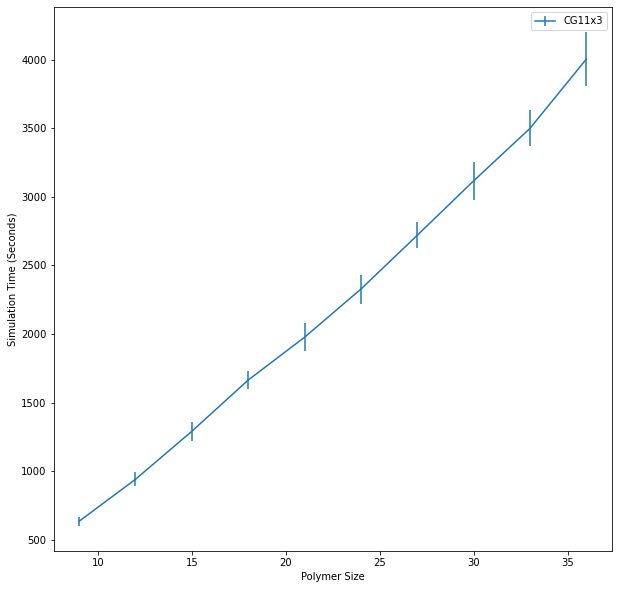

In [6]:
plt.figure(figsize = [10,10])
plt.errorbar(np.array(statepoints['nmer'])*3, means, yerr = stds)
plt.ylabel("Simulation Time (Seconds)")
plt.xlabel("Polymer Size")
plt.legend(["CG11x3"])

In [7]:
np.mean(means)

2217.3520184290405

In [8]:
np.std(means)

1061.2390703788064